In [1]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt
!pip install roboflow

Cloning into 'yolov5'...
remote: Enumerating objects: 16614, done.
remote: Counting objects: 100% (92/92), done.
remote: Compressing objects: 100% (65/65), done.
remote: Total 16614 (delta 48), reused 56 (delta 27), pack-reused 16522
Receiving objects: 100% (16614/16614), 15.09 MiB | 13.55 MiB/s, done.
Resolving deltas: 100% (11407/11407), done.
/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.6/756.6 kB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-n

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.8 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.7
    Uninstalling idna-3.7:
      Successfully uninstalled idna-3.7
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uninstalled cycler-0.1

In [1]:
%cd /content/yolov5

/content/yolov5


In [2]:
from roboflow import Roboflow
rf = Roboflow(api_key="8alt1kWsWIlo930A0quA")
project = rf.workspace("chirag-otenn").project("human-detection-in-thermal")
version = project.version(1)
dataset = version.download("yolov5")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Human-Detection-in-Thermal-1 in yolov5pytorch:: 100%|██████████| 4306/4306 [00:01<00:00, 2440.36it/s]


In [3]:
dataset.location

'/content/yolov5/Human-Detection-in-Thermal-1'

In [4]:
!python train.py --img 640 --batch 16 --epochs 16 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache

2024-05-13 09:57:51.551717: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-13 09:57:51.551766: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-13 09:57:51.553138: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=/content/yolov5/Human-Detection-in-Thermal-1/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=16, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=

In [5]:
!python val.py --data {dataset.location}/data.yaml --weights "/content/yolov5/runs/train/exp/weights/best.pt"

val: data=/content/yolov5/Human-Detection-in-Thermal-1/data.yaml, weights=['/content/yolov5/runs/train/exp/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-312-g1bcd17ee Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /content/yolov5/Human-Detection-in-Thermal-1/valid/labels.cache... 153 images, 9 backgrounds, 0 corrupt: 100% 153/153 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     I

In [7]:
!python detect.py --weights '/content/yolov5/runs/train/exp/weights/best.pt' --source '/content/yolov5/Human-Detection-in-Thermal-1/test/images'

detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/yolov5/Human-Detection-in-Thermal-1/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-312-g1bcd17ee Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/74 /content/yolov5/Human-Detection-in-Thermal-1/test/images/3_103_jpeg.rf.e616baaa5016cacafb5c86db8bcc814e.jpg: 640x640 1 Human, 11.5ms
image 2/74 /content/yolov5/Human-Detection-in-Thermal-1/test/images/3_82_jpeg.rf.8aa577f6ad6cc824994ae48b45d94fbb.jpg: 640x640 1 Hum

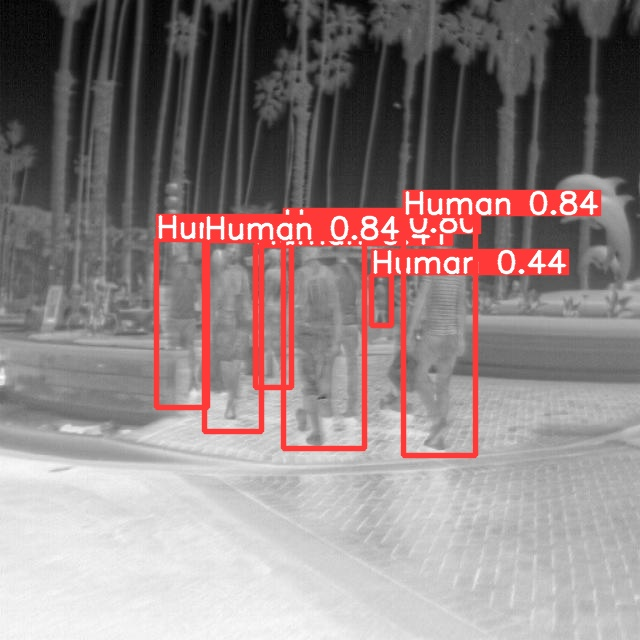

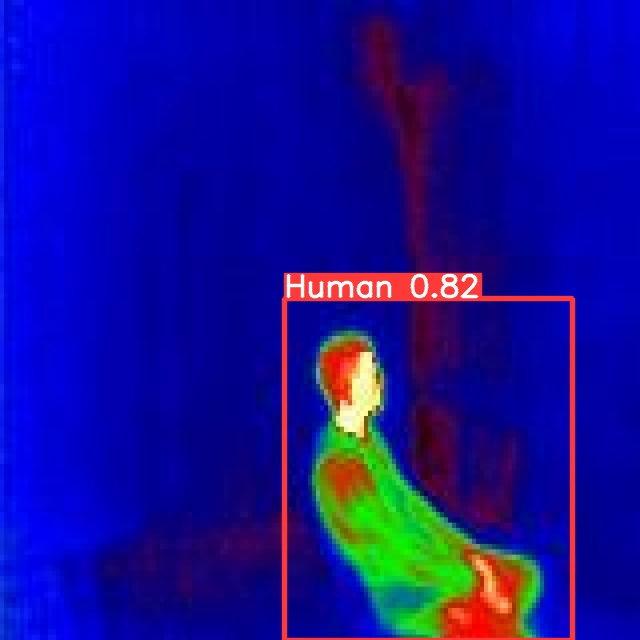

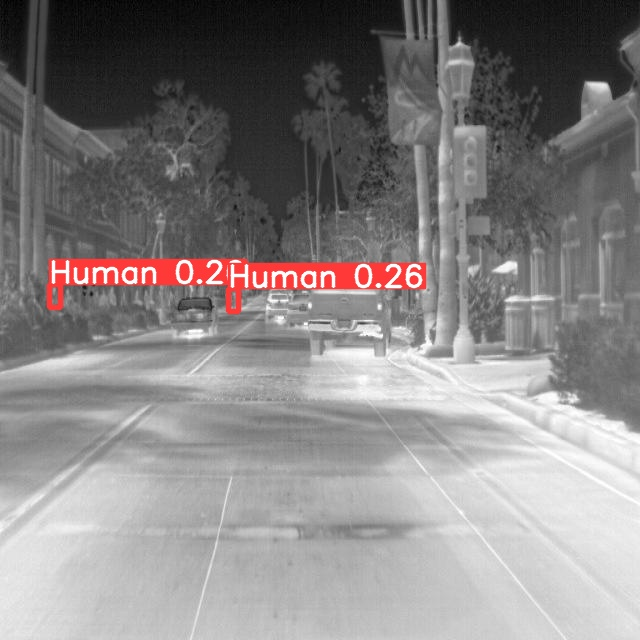

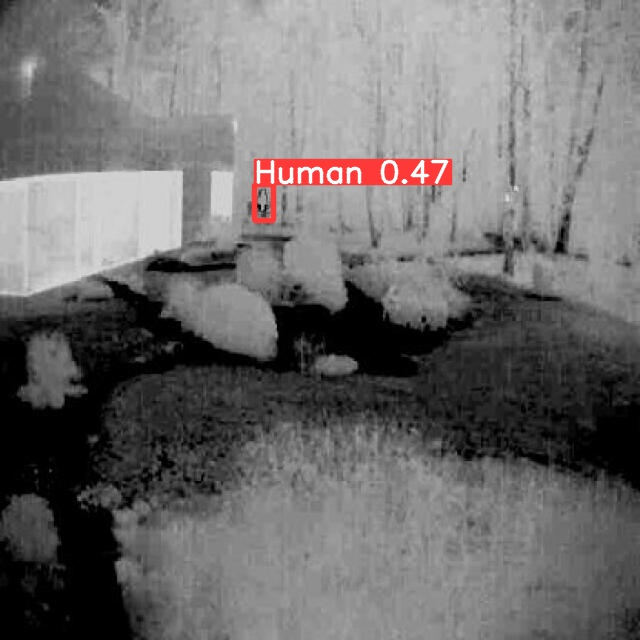

In [8]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('/content/yolov5/runs/detect/exp/*.jpg')[:4]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [9]:
import shutil
import os
import zipfile
directory_to_zip = '/content/yolov5/runs'
zip_file_path = '/content/YOLO_v5_N.zip'
with zipfile.ZipFile(zip_file_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for root, dirs, files in os.walk(directory_to_zip):
        for file in files:
            zipf.write(os.path.join(root, file), os.path.relpath(os.path.join(root, file), directory_to_zip))

In [10]:
import locale
print(locale.getpreferredencoding())

UTF-8


In [11]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [13]:
!pip install google-api-python-client
from google.colab import auth
from googleapiclient.discovery import build
from googleapiclient.http import MediaFileUpload


auth.authenticate_user()

In [14]:
drive_service = build('drive', 'v3')

In [15]:
file_metadata = {'name': 'YOLO_v5_N.zip'}
media = MediaFileUpload(zip_file_path, resumable=True)
file = drive_service.files().create(body=file_metadata, media_body=media, fields='id').execute()
print(f"Uploaded '{zip_file_path}' to Google Drive with ID: {file.get('id')}")

Uploaded '/content/YOLO_v5_N.zip' to Google Drive with ID: 1wald9H_Nre098RaIq6ab22C3UgkOQvwm
